## HW1: Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random

## Load data

In [2]:
train_df = pd.read_csv("train_data.csv")
x_train, y_train = train_df['x_train'], train_df['y_train']

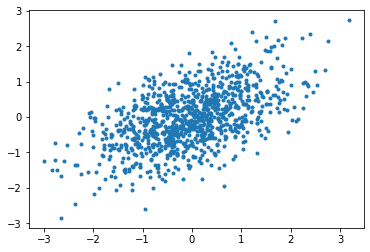

In [3]:
plt.plot(x_train, y_train, '.')

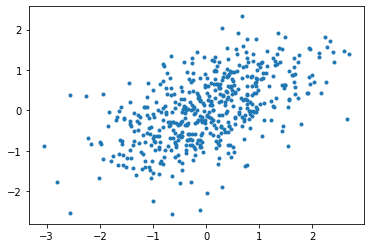

In [4]:
test_df = pd.read_csv("test_data.csv")
x_test, y_test = test_df['x_test'], test_df['y_test']
plt.plot(x_test, y_test, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [5]:
# def linear_regression_test(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
#      N = float(len(y))
#      for i in range(epochs):
#           y_current = (m_current * X) + b_current
#           cost = sum([data**2 for data in (y-y_current)]) / N
#           m_gradient = -(2/N) * sum(X * (y - y_current))
#           b_gradient = -(2/N) * sum(y - y_current)
#           m_current = m_current - (learning_rate * m_gradient)
#           b_current = b_current - (learning_rate * b_gradient)
#      return m_current, b_current, cost

In [6]:
# # building model
# m = 0
# c = 0
# L = 0.0001  # learning Rate
# epochs = 10000  # The number of iterations to perform gradient descent

# X = x_train
# Y = y_train
# n = float(len(X)) # Number of elements in X

# # Performing Gradient Descent 
# for i in range(epochs): 
#     Y_pred = m*X + c  # The current predicted value of Y
#     D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
#     D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
#     c = c - L * D_c  # Update c
#     m = m - L * D_m  # Update m 
    
# print (m, c)

In [7]:
def LinearRegression_MSE(x_data, y_data, L=0.001, epochs=10000):
    """Construct a Linear regression model(y = b0 + b1x) with MSE as objective function.

    Arguments:
    L -- learning rate
    epochs -- number of iterations
    """
    # random initialize b0, b1 between [-1, 1]
    b0 = random.uniform(-1, 1)
    b1 = random.uniform(-1, 1)
    print('initial b0, b1:', b0, b1)

    X = x_data
    Y = y_data
    n = len(X)

    record_MSE, record_MAE = [], [] # keep track of loss

    # Gradient Descent 
    for i in range(epochs): 
        Y_pred = b0 + b1 * X  # The current predicted value
        
        MSE_loss = sum((Y - Y_pred)**2) / n
        MAE_loss = sum(abs(Y - Y_pred)) / n

        D_b0 = (-2/n) * sum(Y - Y_pred)  # Derivative wrt b0
        D_b1 = (-2/n) * sum((Y - Y_pred) * X)  # Derivative wrt b1
        b0 = b0 - L * D_b0  # Update b0
        b1 = b1 - L * D_b1  # Update b1

        record_MSE.append(MSE_loss)
        record_MAE.append(MAE_loss)
    
    return b0, b1, record_MSE, record_MAE

initial b0, b1: 0.9336093267057595 0.3545971217495165
result b0, b1: -0.0012672016174673749 0.4527345679858962
final MSE: 0.470894558492666
final MAE: 0.5503357959213664


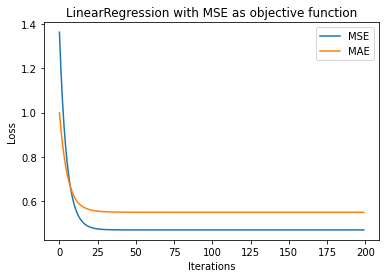

In [8]:
B0_MSEmodel, B1_MSEmodel, record_MSE, record_MAE = LinearRegression_MSE(x_train, y_train, L=0.05, epochs=200)
print('result b0, b1:', B0_MSEmodel, B1_MSEmodel)
print('final MSE:', record_MSE[-1])
print('final MAE:', record_MAE[-1])

# draw matplotlib figure
x = range(0, len(record_MSE))
y1 = record_MSE
y2 = record_MAE
plt.title("LinearRegression with MSE as objective function")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(x, y1, label='MSE')
plt.plot(x, y2, label='MAE')
plt.legend()
plt.show()

In [9]:
def LinearRegression_MAE(x_data, y_data, L=0.001, epochs=10000):
    """Construct a Linear regression model(y = b0 + b1x) with MAE as objective function.

    Arguments:
    L -- learning rate
    epochs -- number of iterations
    """
    # random initialize b0, b1 between [-1, 1]
    b0 = random.uniform(-1, 1)
    b1 = random.uniform(-1, 1)
    print('initial b0, b1:', b0, b1)

    X = x_data
    Y = y_data
    n = len(X)

    record_MSE, record_MAE = [], [] # keep track of loss

    # Gradient Descent 
    for i in range(epochs): 
        Y_pred = b0 + b1 * X  # The current predicted value
        
        MSE_loss = sum((Y - Y_pred)**2) / n
        MAE_loss = sum(abs(Y - Y_pred)) / n

        D_b0 = sum([np.sign(tmp) for tmp in (Y_pred - Y)]) / n # Derivative wrt b0
        D_b1 = sum([np.sign(tmp) * x for tmp, x in zip((Y_pred - Y), X)]) / n # Derivative wrt b1
        b0 = b0 - L * D_b0  # Update b0
        b1 = b1 - L * D_b1  # Update b1

        record_MSE.append(MSE_loss)
        record_MAE.append(MAE_loss)
    
    return b0, b1, record_MSE, record_MAE

initial b0, b1: 0.7664897727708799 0.3008724261393616
result b0, b1: -0.03811022722912001 0.43510469011415254
final MSE: 0.472485486400077
final MAE: 0.5492654114502037


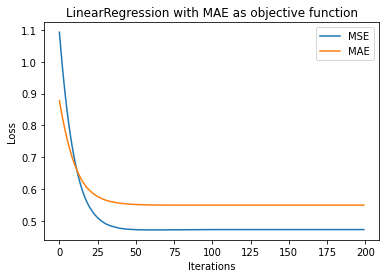

In [10]:
B0_MAEmodel, B1_MAEmodel, record_MSE, record_MAE = LinearRegression_MAE(x_train, y_train, L=0.05, epochs=200)
print('result b0, b1:', B0_MAEmodel, B1_MAEmodel)
print('final MSE:', record_MSE[-1])
print('final MAE:', record_MAE[-1])

# draw matplotlib figure
x = range(0, len(record_MSE))
y1 = record_MSE
y2 = record_MAE
plt.title("LinearRegression with MAE as objective function")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(x, y1, label='MSE')
plt.plot(x, y2, label='MAE')
plt.legend()
plt.show()

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the MSE of (y_test, y_pred)

In [11]:
test_data = pd.read_csv("test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']

In [12]:
# y_pred = model(x_test)
y_pred_MSEmodel = B0_MSEmodel + B1_MSEmodel * x_test
y_pred_MAEmodel = B0_MAEmodel + B1_MAEmodel * x_test

In [13]:
# evalulate the LinearRegression_MSE model with test data
n = len(y_test)
resultMSE = sum((y_test - y_pred_MSEmodel)**2) / n
resultMAE = sum(abs(y_test - y_pred_MSEmodel)) / n
print('the MSE of LinearRegression_MSE model:', resultMSE)
print('the MAE of LinearRegression_MSE model:', resultMAE)

the MSE of LinearRegression_MSE model: 0.4909025640277726
the MAE of LinearRegression_MSE model: 0.5613177325060341


In [14]:
# evalulate the LinearRegression_MAE model with test data
n = len(y_test)
resultMSE = sum((y_test - y_pred_MAEmodel)**2) / n
resultMAE = sum(abs(y_test - y_pred_MAEmodel)) / n
print('the MSE of LinearRegression_MAE model:', resultMSE)
print('the MAE of LinearRegression_MAE model:', resultMAE)

the MSE of LinearRegression_MAE model: 0.49425363604236194
the MAE of LinearRegression_MAE model: 0.5639081187841204
